In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
import  import_ipynb
import pytz
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

# Будем использовать только обучающую выборку
data = pd.read_csv('test.csv')
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [117]:
# Нужно ли масштабирование
data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [118]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop(['n_cores','m_dep','ram','wifi'], axis=1)

In [119]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_data(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [120]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['ram'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_data(X_train)
X_test_df = arr_to_data(X_test)

X_train_df.shape, X_test_df.shape

((800, 17), (200, 17))

In [121]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [122]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_data(data_cs11_scaled_temp)
data_cs11_scaled

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
0,-1.730320,-0.475451,0.968496,0.312601,0.966559,2.108676,-0.974329,-1.581269,1.535535,0.976026,-0.926990,0.391912,0.001158,0.397363,-1.653355,-1.760216,1.0
1,-1.726856,-0.942782,0.968496,-1.255832,0.966559,-0.132927,1.026347,1.509303,1.478120,0.319433,0.274729,-0.871028,-1.388231,-1.254383,-0.743418,0.568112,-1.0
2,-1.723391,1.292077,0.968496,1.519087,-1.034598,-0.805408,-0.974329,-0.367116,1.334582,-0.993754,1.485693,0.287236,1.158982,1.105254,-0.197456,-1.760216,1.0
3,-1.719927,0.688249,-1.032529,-1.255832,0.966559,3.005317,1.026347,-0.477493,-1.249091,1.632619,-0.767532,1.165604,-0.461972,-1.254383,-0.743418,0.568112,1.0
4,-1.716463,0.429135,-1.032529,-0.169994,-1.034598,1.436195,1.026347,0.847037,-0.904602,1.304323,0.281662,-0.977979,0.695852,0.633326,-0.743418,0.568112,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.716463,1.044531,0.968496,0.433249,-1.034598,-1.029568,1.026347,1.122981,0.875263,1.140174,0.039007,-0.743596,0.464287,0.633326,0.712481,0.568112,1.0
996,1.719927,-1.479519,-1.032529,0.312601,0.966559,-1.029568,-0.974329,-1.139759,1.334582,-1.322051,1.212995,0.892536,-0.925101,-1.018419,1.440430,-1.760216,1.0
997,1.723391,-0.146932,-1.032529,-0.169994,-1.034598,-0.805408,1.026347,-1.415702,-1.708411,0.319433,-0.346930,-0.943846,-1.619796,-1.254383,0.530493,0.568112,-1.0
998,1.726856,0.658173,0.968496,-1.255832,0.966559,-1.029568,-0.974329,0.902226,0.903970,0.319433,-1.361458,-0.927917,0.695852,1.341217,-0.925406,-1.760216,1.0


In [123]:
data_cs11_scaled.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.0000
mean,9.348078e-17,4.998779e-17,-7.660539e-17,-8.570922e-17,-2.013945e-16,-3.966272e-17,-7.194245e-17,-3.178013e-17,1.183931e-16,-4.463097e-17,6.011858e-17,2.511324e-16,1.696421e-16,7.993606e-18,-1.620926e-16,3.170797e-16,0.0000
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.0005
min,-1.730320e+00,-1.731692e+00,-1.032529e+00,-1.255832e+00,-1.034598e+00,-1.029568e+00,-9.743294e-01,-1.746835e+00,-1.708411e+00,-1.650347e+00,-1.449276e+00,-1.681129e+00,-1.619796e+00,-1.254383e+00,-1.653355e+00,-1.760216e+00,-1.0000
25%,-8.651598e-01,-8.178521e-01,-1.032529e+00,-1.014535e+00,-1.034598e+00,-8.054080e-01,-9.743294e-01,-8.638147e-01,-8.543635e-01,-8.296057e-01,-8.397502e-01,-9.284856e-01,-9.251013e-01,-7.824554e-01,-7.889153e-01,5.681121e-01,-1.0000
50%,0.000000e+00,-4.650173e-03,9.684960e-01,-4.934530e-02,9.665588e-01,-3.570874e-01,-9.743294e-01,4.680008e-02,-1.466953e-02,-8.864010e-03,-1.447171e-01,2.326994e-02,1.157824e-03,-7.456451e-02,-1.546893e-02,5.681121e-01,0.0000
75%,8.651598e-01,8.808493e-01,9.684960e-01,9.158440e-01,9.665588e-01,5.395539e-01,1.026347e+00,8.470373e-01,8.752625e-01,9.760260e-01,6.375563e-01,9.056207e-01,9.274170e-01,6.333264e-01,8.944680e-01,5.681121e-01,1.0000
max,1.730320e+00,1.736273e+00,9.684960e-01,1.760385e+00,9.665588e-01,3.229478e+00,1.026347e+00,1.674869e+00,1.736487e+00,1.632619e+00,2.957800e+00,1.725393e+00,1.622111e+00,2.992963e+00,1.622418e+00,5.681121e-01,1.0000


In [124]:
# Построение плотности распределения
def draw_kde(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

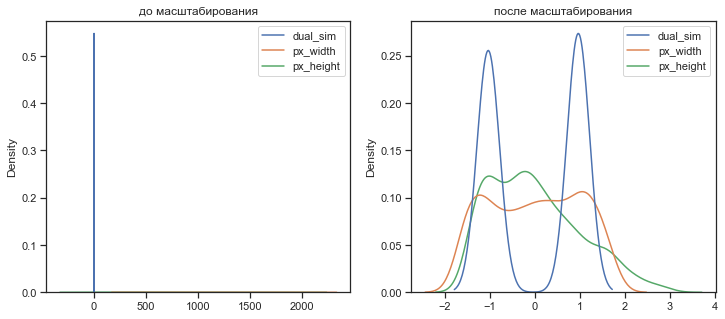

In [125]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [126]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [127]:
data_cs12_scaled_train.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-7.022161e-17,-6.328271e-17,2.847722e-16,-2.875478e-16,2.733924e-16,-4.773959e-17,-2.470246e-16,-8.916479e-17,2.439715e-16,-1.050549e-16,-9.159340e-18,-3.622103e-17,-2.470246e-17,4.218847e-17,-1.254899e-16,2.196854e-16,5.191680e-16
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-1.729672e+00,-1.716841e+00,-1.035635e+00,-1.255733e+00,-1.078036e+00,-1.013195e+00,-9.728679e-01,-1.728332e+00,-1.718799e+00,-1.629914e+00,-1.453497e+00,-1.701268e+00,-1.577682e+00,-1.254578e+00,-1.650591e+00,-1.743675e+00,-9.975031e-01
25%,-8.419447e-01,-8.328932e-01,-1.035635e+00,-1.015344e+00,-1.078036e+00,-7.893462e-01,-9.728679e-01,-9.068816e-01,-8.536682e-01,-8.150587e-01,-8.485941e-01,-9.173703e-01,-8.937156e-01,-7.807054e-01,-7.476421e-01,5.735012e-01,-9.975031e-01
50%,-2.163997e-02,5.224631e-03,9.655916e-01,-5.378709e-02,9.276126e-01,-3.416490e-01,-9.728679e-01,7.885927e-02,-1.737472e-02,-2.037137e-04,-1.359207e-01,1.458475e-02,1.823909e-02,-6.989624e-02,-2.528258e-02,5.735012e-01,-9.975031e-01
75%,8.781886e-01,8.903183e-01,9.655916e-01,9.077698e-01,9.276126e-01,5.537455e-01,1.027889e+00,8.044740e-01,8.765942e-01,9.776222e-01,6.393289e-01,8.994830e-01,9.301938e-01,6.409129e-01,8.776668e-01,5.735012e-01,1.002503e+00
max,1.724425e+00,1.715833e+00,9.655916e-01,1.749132e+00,9.276126e-01,3.239929e+00,1.027889e+00,1.666997e+00,1.741725e+00,1.629506e+00,2.966236e+00,1.735029e+00,1.614160e+00,3.010277e+00,1.600026e+00,5.735012e-01,1.002503e+00


In [128]:
# Построение плотности распределения
def draw_kde(col_list, data1, data2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=data1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=data2[col_list], ax=ax2)
    plt.show()

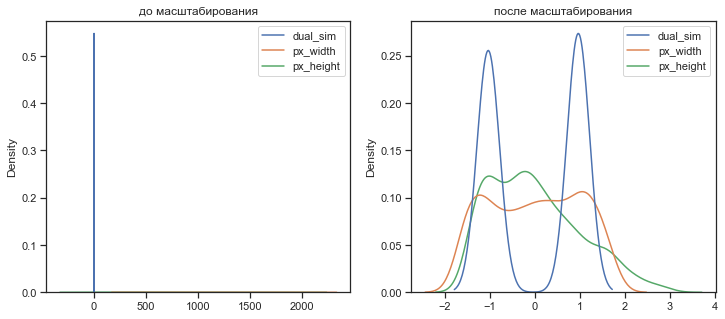

In [129]:

draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [130]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [131]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-0.000760,-0.000474,-0.001500,-0.001540,-0.020500,0.003513,0.000750,0.001484,-0.000762,0.002637,-0.000013,-0.001585,0.005357,0.001167,-0.003056,0.003500,0.00125
std,0.289109,0.288690,0.499994,0.331707,0.499961,0.234912,0.500081,0.292398,0.290430,0.304755,0.227021,0.293701,0.308615,0.235559,0.305424,0.429708,0.50025
min,-0.500760,-0.500147,-0.517500,-0.417900,-0.537500,-0.238224,-0.486250,-0.509032,-0.496687,-0.500063,-0.328865,-0.495088,-0.494286,-0.294167,-0.507778,-0.752500,-0.49875
25%,-0.250760,-0.236462,-0.517500,-0.337900,-0.537500,-0.185592,-0.486250,-0.250968,-0.248771,-0.250063,-0.190559,-0.274146,-0.280000,-0.183056,-0.243889,0.247500,-0.49875
50%,-0.000760,-0.001816,0.482500,-0.017900,0.462500,-0.080329,-0.486250,0.015161,-0.005021,-0.000063,-0.032851,0.005246,0.005714,-0.016389,-0.007778,0.247500,0.00125
75%,0.249240,0.253692,0.482500,0.302100,0.462500,0.130197,0.513750,0.249032,0.253313,0.299937,0.144653,0.264264,0.291429,0.150278,0.270000,0.247500,0.50125
max,0.499240,0.500521,0.482500,0.582100,0.462500,0.761776,0.513750,0.490968,0.503313,0.499937,0.671135,0.504912,0.505714,0.705833,0.492222,0.247500,0.50125


In [132]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [133]:
data_cs22_scaled_train.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-2.185752e-17,-2.019218e-17,-4.912737e-17,-2.135098e-16,8.437695e-17,-3.157197e-18,-6.356027e-17,-3.578735e-17,7.178286e-17,-3.691492e-17,2.532696e-18,-2.498002e-18,8.465451e-18,2.116363e-18,-2.936019e-17,1.376677e-16,1.648681e-16
std,2.896924e-01,2.915003e-01,5.000063e-01,3.330018e-01,4.989037e-01,2.352684e-01,5.001236e-01,2.947065e-01,2.891543e-01,3.069950e-01,2.263995e-01,2.911930e-01,3.134948e-01,2.346212e-01,3.078263e-01,4.318296e-01,5.003112e-01
min,-5.007595e-01,-5.001469e-01,-5.175000e-01,-4.179000e-01,-5.375000e-01,-2.382237e-01,-4.862500e-01,-5.090323e-01,-4.966875e-01,-5.000625e-01,-3.288654e-01,-4.950877e-01,-4.942857e-01,-2.941667e-01,-5.077778e-01,-7.525000e-01,-4.987500e-01
25%,-2.437525e-01,-2.426368e-01,-5.175000e-01,-3.379000e-01,-5.375000e-01,-1.855921e-01,-4.862500e-01,-2.670968e-01,-2.466875e-01,-2.500625e-01,-1.920012e-01,-2.669648e-01,-2.800000e-01,-1.830556e-01,-2.300000e-01,2.475000e-01,-4.987500e-01
50%,-6.265015e-03,1.522029e-03,4.825000e-01,-1.790000e-02,4.625000e-01,-8.032895e-02,-4.862500e-01,2.322581e-02,-5.020833e-03,-6.250000e-05,-3.075315e-02,4.244322e-03,5.714286e-03,-1.638889e-02,-7.777778e-03,2.475000e-01,-4.987500e-01
75%,2.542455e-01,2.593658e-01,4.825000e-01,3.021000e-01,4.625000e-01,1.301974e-01,5.137500e-01,2.369355e-01,2.533125e-01,2.999375e-01,1.446533e-01,2.617594e-01,2.914286e-01,1.502778e-01,2.700000e-01,2.475000e-01,5.012500e-01
max,4.992405e-01,4.998531e-01,4.825000e-01,5.821000e-01,4.625000e-01,7.617763e-01,5.137500e-01,4.909677e-01,5.033125e-01,4.999375e-01,6.711346e-01,5.049123e-01,5.057143e-01,7.058333e-01,4.922222e-01,2.475000e-01,5.012500e-01


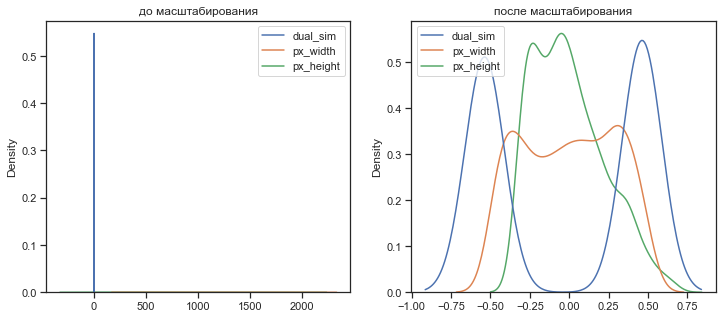

In [134]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

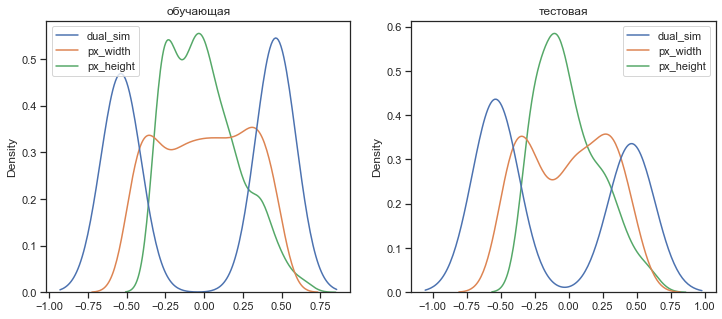

In [135]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

In [136]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.500000,0.499340,0.516000,0.416360,0.517000,0.241737,0.487000,0.510516,0.495925,0.502700,0.328852,0.493503,0.499643,0.295333,0.504722,0.756000,0.50000
std,0.289109,0.288498,0.499994,0.331707,0.499961,0.234912,0.500081,0.292398,0.290430,0.304755,0.227021,0.293701,0.308615,0.235559,0.305424,0.429708,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.250000,0.263509,0.000000,0.080000,0.000000,0.052632,0.000000,0.258065,0.247917,0.250000,0.138306,0.220942,0.214286,0.111111,0.263889,1.000000,0.00000
50%,0.500000,0.497999,1.000000,0.400000,1.000000,0.157895,0.000000,0.524194,0.491667,0.500000,0.296015,0.500334,0.500000,0.277778,0.500000,1.000000,0.50000
75%,0.750000,0.753336,1.000000,0.720000,1.000000,0.368421,1.000000,0.758065,0.750000,0.800000,0.473519,0.759352,0.785714,0.444444,0.777778,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [137]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

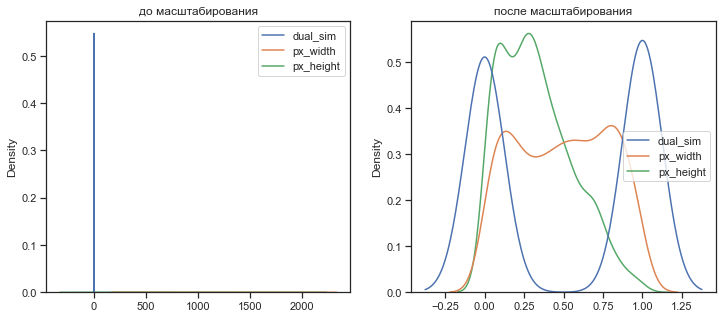

In [138]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

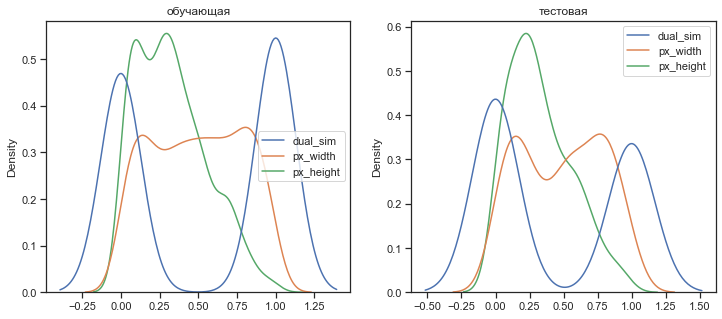

In [139]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

In [140]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-5.040413e-17,0.002737,-0.484000,0.025563,-0.483000,0.265500,0.487000,-0.027355,0.008481,0.004909,0.097960,-0.012687,-0.000625,0.052667,0.009189,-0.244000,0.00000
std,5.782171e-01,0.588980,0.499994,0.518292,0.499961,0.743888,0.500081,0.584797,0.578449,0.554100,0.677246,0.545497,0.540076,0.706677,0.594339,0.429708,0.50025
min,-1.000000e+00,-1.016684,-1.000000,-0.625000,-1.000000,-0.500000,0.000000,-1.048387,-0.979253,-0.909091,-0.883066,-0.929280,-0.875000,-0.833333,-0.972973,-1.000000,-0.50000
25%,-5.000000e-01,-0.478720,-1.000000,-0.500000,-1.000000,-0.333333,0.000000,-0.532258,-0.485477,-0.454545,-0.470473,-0.518921,-0.500000,-0.500000,-0.459459,0.000000,-0.50000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,5.000000e-01,0.521280,0.000000,0.500000,0.000000,0.666667,1.000000,0.467742,0.514523,0.545455,0.529527,0.481079,0.500000,0.500000,0.540541,0.000000,0.50000
max,1.000000e+00,1.024855,0.000000,0.937500,0.000000,2.666667,1.000000,0.951613,1.012448,0.909091,2.100117,0.928040,0.875000,2.166667,0.972973,0.000000,0.50000


In [141]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

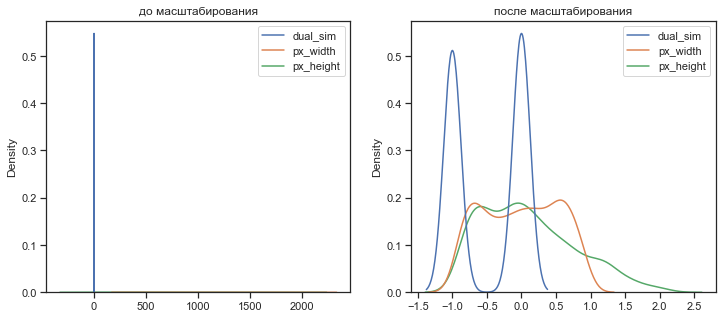

In [142]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

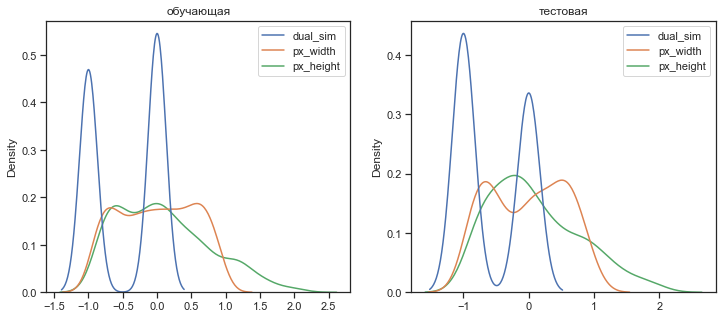

In [143]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

In [144]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.500500,0.624567,0.516000,0.513633,0.517000,0.241737,0.487000,0.525813,0.697555,0.502700,0.328852,0.620508,0.631316,0.295333,0.554250,0.756000,0.50000
std,0.288819,0.216337,0.499994,0.276423,0.499961,0.234912,0.500081,0.283261,0.174258,0.304755,0.227021,0.220056,0.227400,0.235559,0.274882,0.429708,0.50025
min,0.001000,0.250125,0.000000,0.166667,0.000000,0.000000,0.000000,0.031250,0.400000,0.000000,0.000000,0.250751,0.263158,0.000000,0.100000,0.000000,0.00000
25%,0.250750,0.447724,0.000000,0.233333,0.000000,0.052632,0.000000,0.281250,0.548750,0.250000,0.138306,0.416291,0.421053,0.111111,0.337500,1.000000,0.00000
50%,0.500500,0.623562,1.000000,0.500000,1.000000,0.157895,0.000000,0.539062,0.695000,0.500000,0.296015,0.625626,0.631579,0.277778,0.550000,1.000000,0.50000
75%,0.750250,0.815033,1.000000,0.766667,1.000000,0.368421,1.000000,0.765625,0.850000,0.800000,0.473519,0.819695,0.842105,0.444444,0.800000,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [145]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

C:\Users\twai1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
C:\Users\twai1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


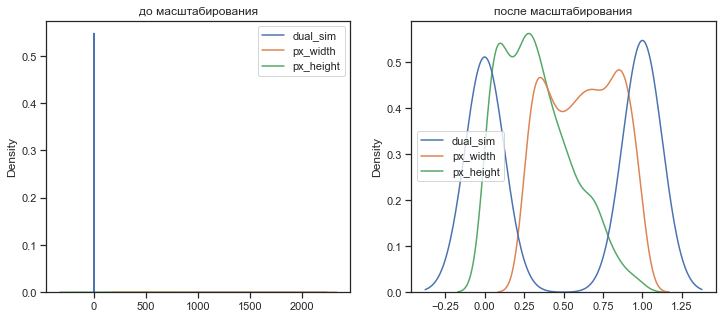

In [146]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

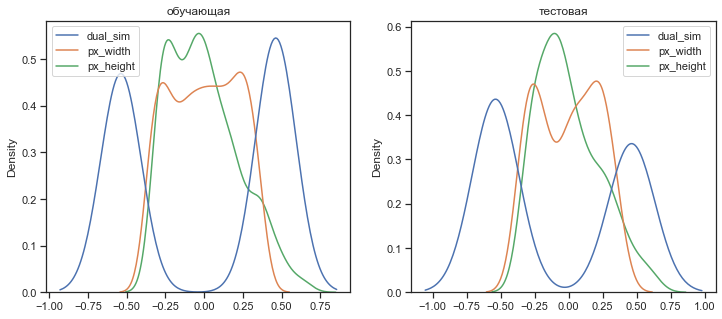

In [147]:
draw_kde(['dual_sim', 'px_width', 'px_height'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

In [148]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

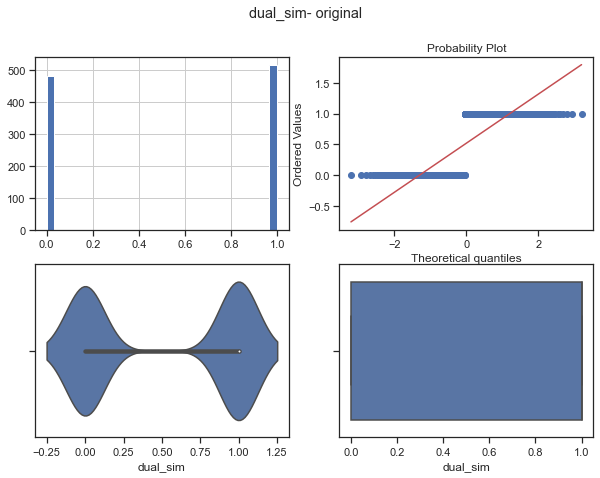

In [149]:
diagnostic_plots(data, 'dual_sim', 'dual_sim- original')

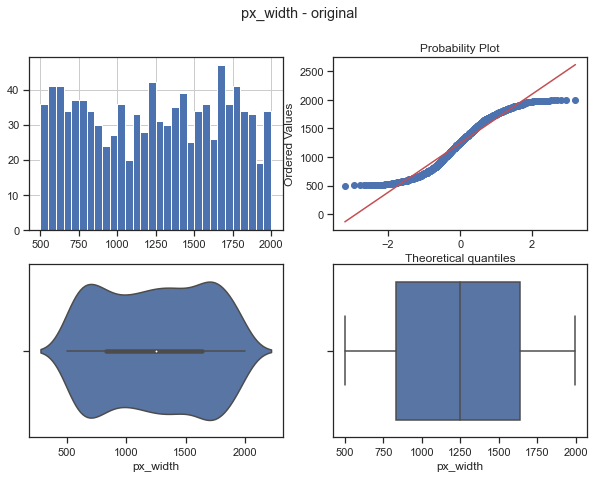

In [150]:
diagnostic_plots(data, 'px_width', 'px_width - original')

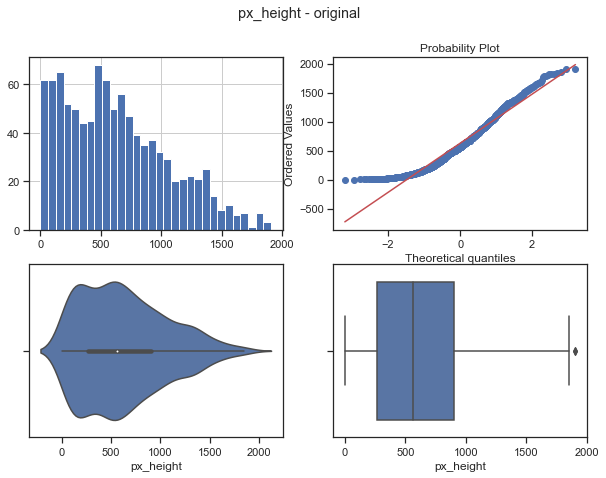

In [151]:
diagnostic_plots(data, 'px_height', 'px_height - original')

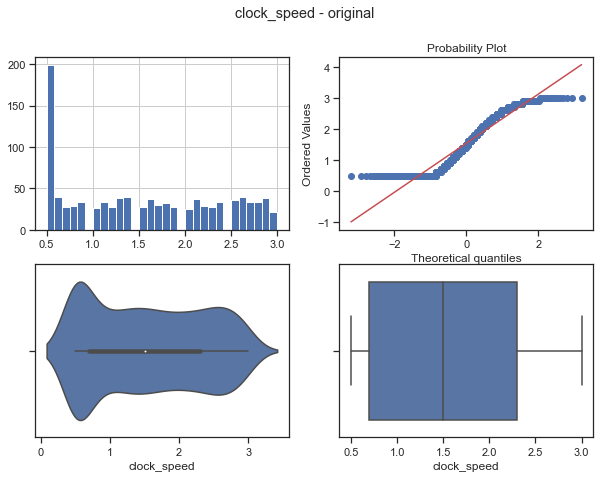

In [152]:
diagnostic_plots(data, 'clock_speed', 'clock_speed - original')

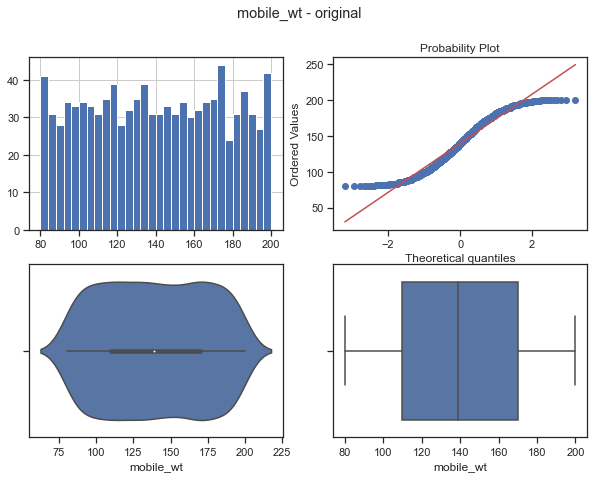

In [153]:
diagnostic_plots(data, 'mobile_wt', 'mobile_wt - original')

In [154]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary    

In [155]:
data.shape

(1000, 21)

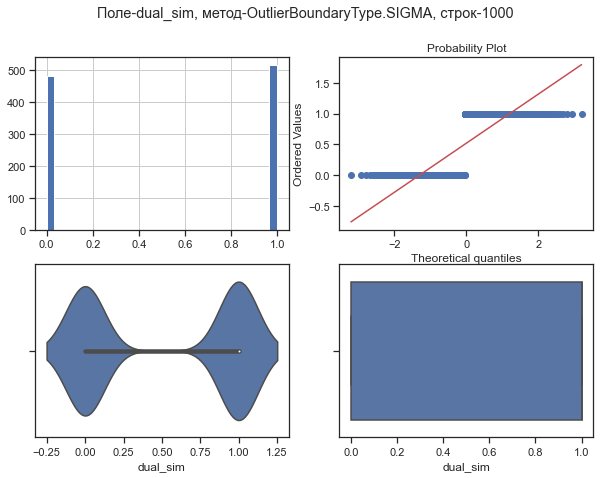

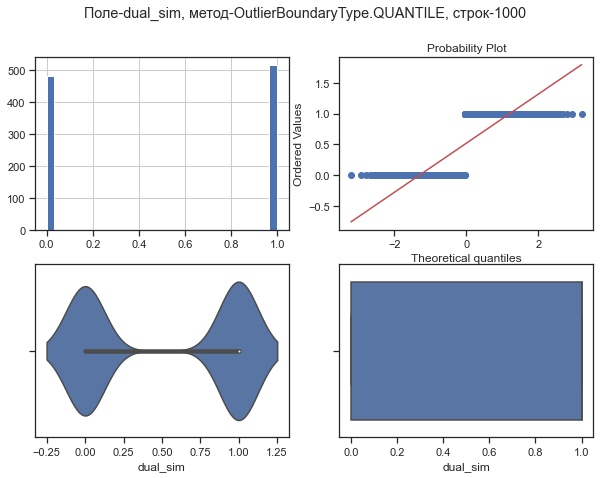

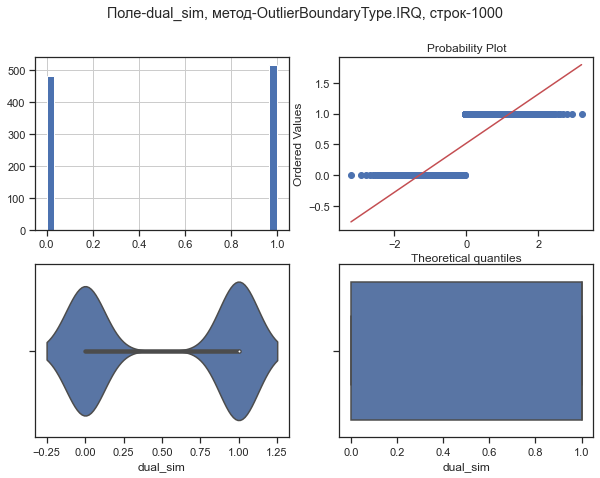

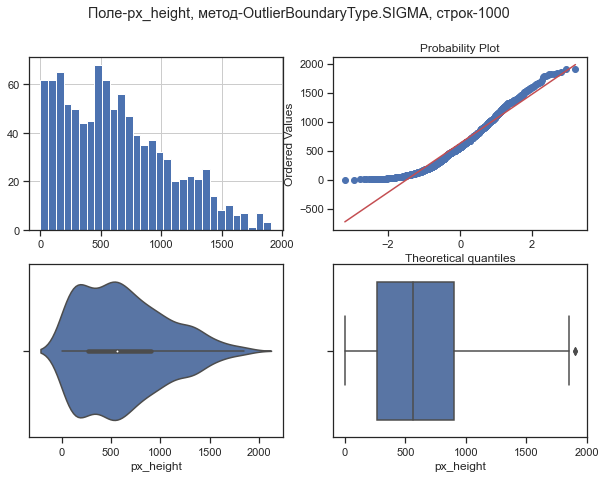

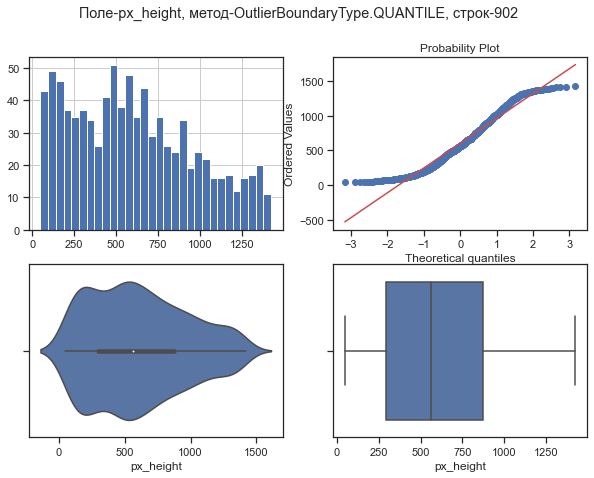

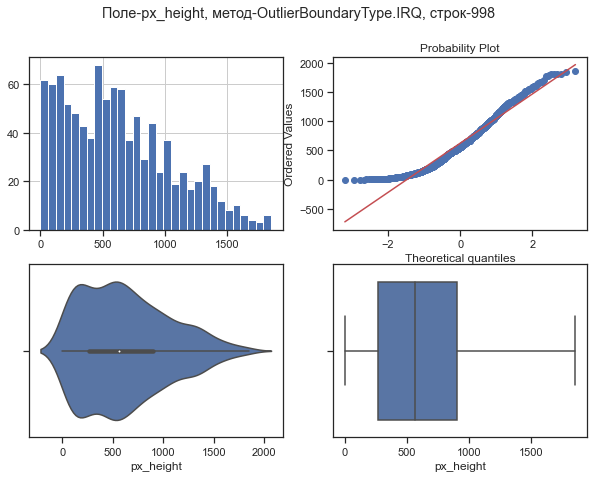

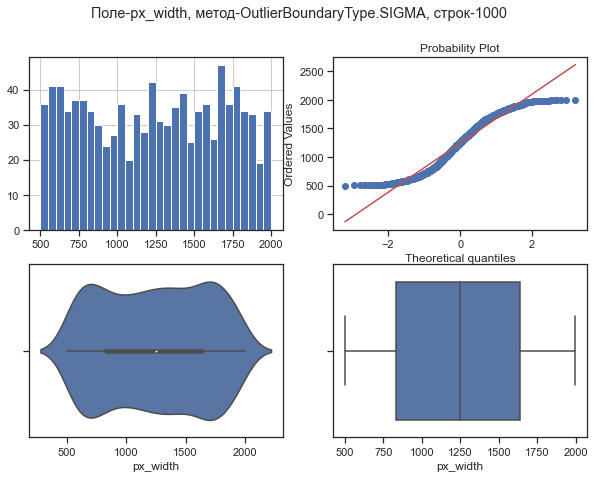

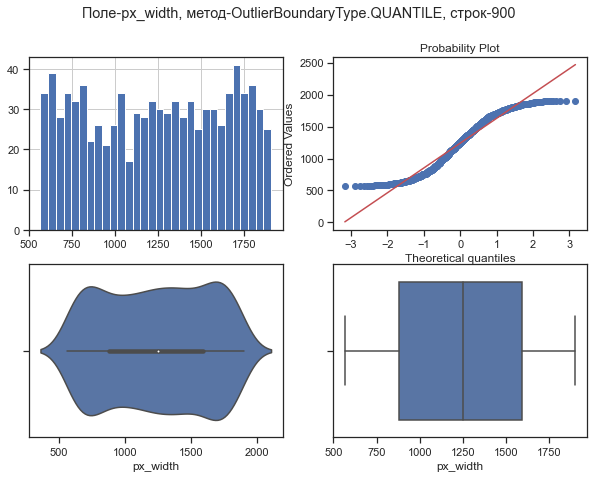

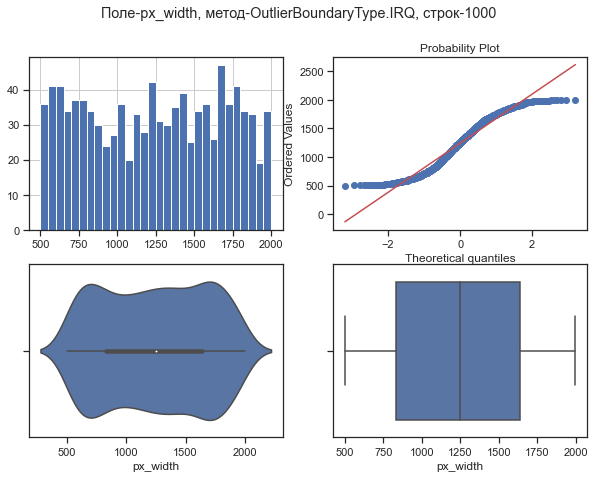

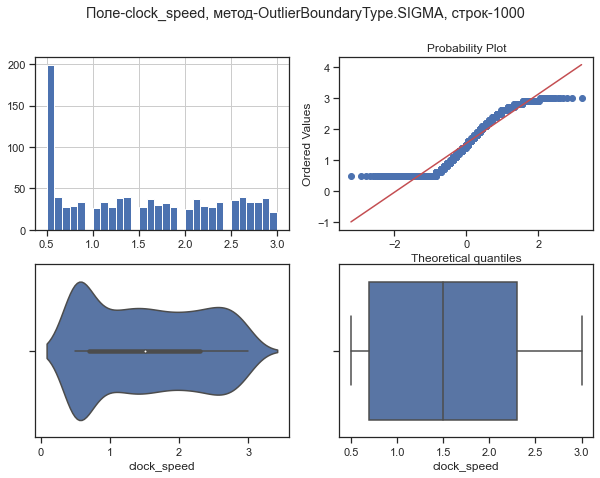

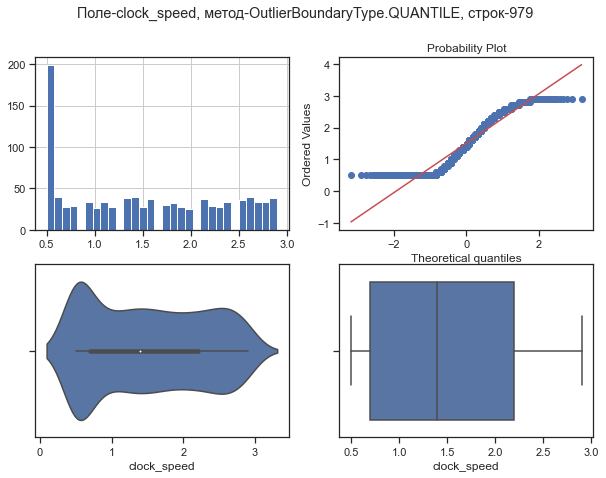

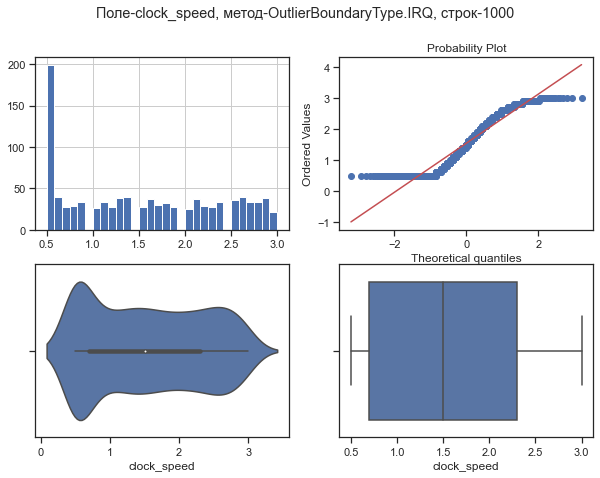

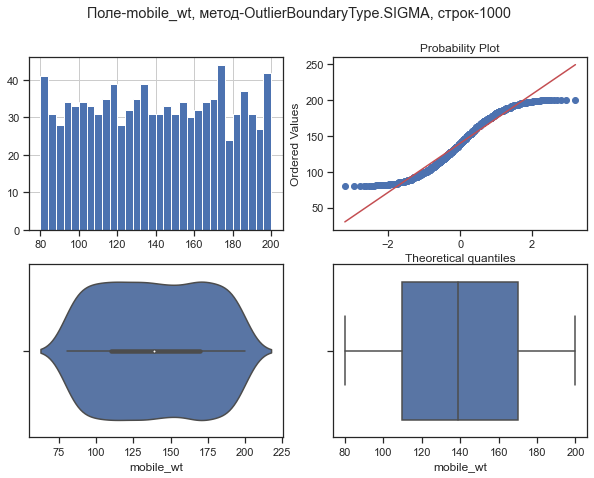

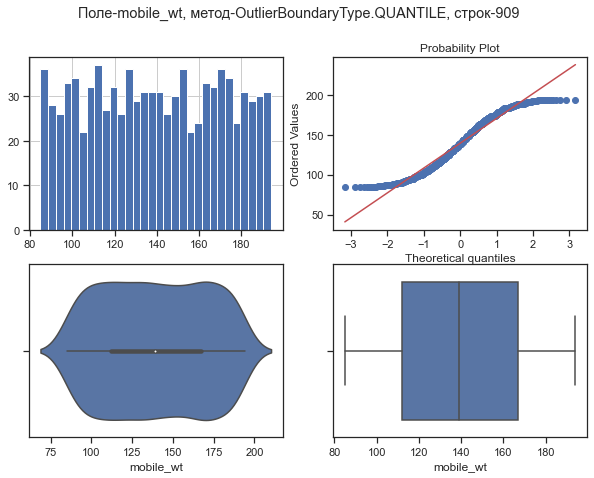

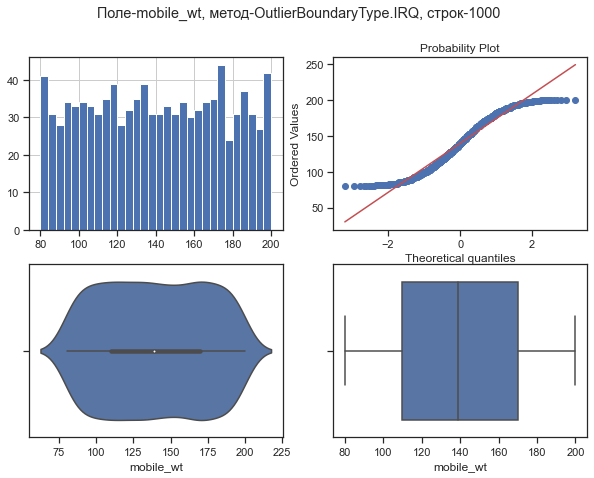

In [156]:
x_col_list=['dual_sim', 'px_height', 'px_width', 'clock_speed', 'mobile_wt']
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

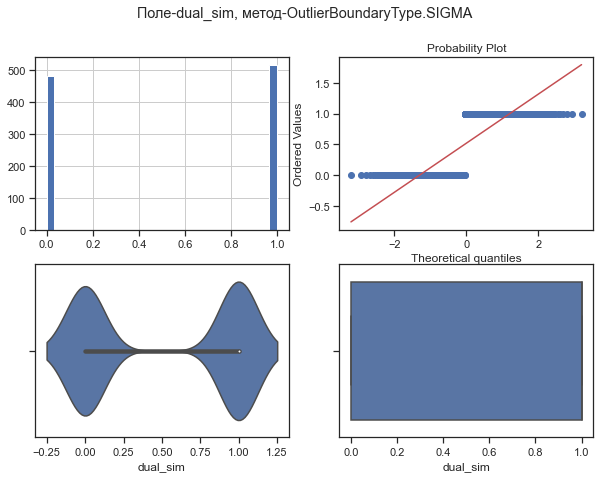

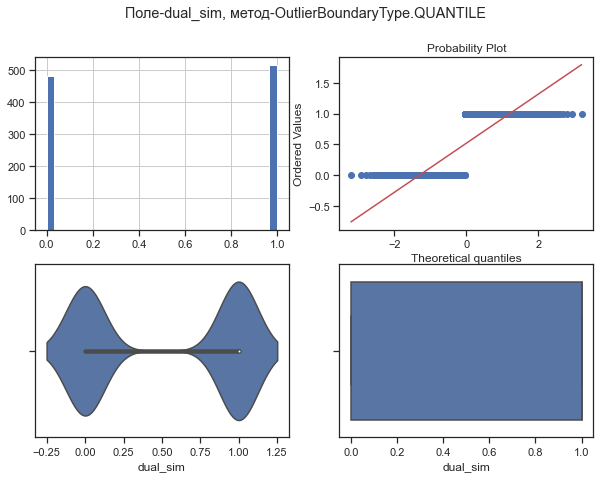

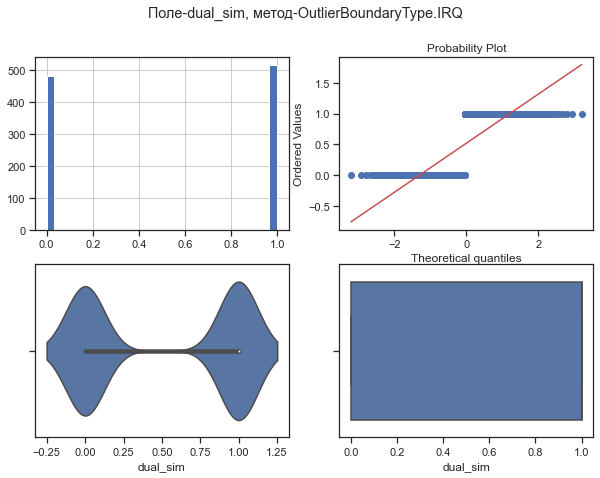

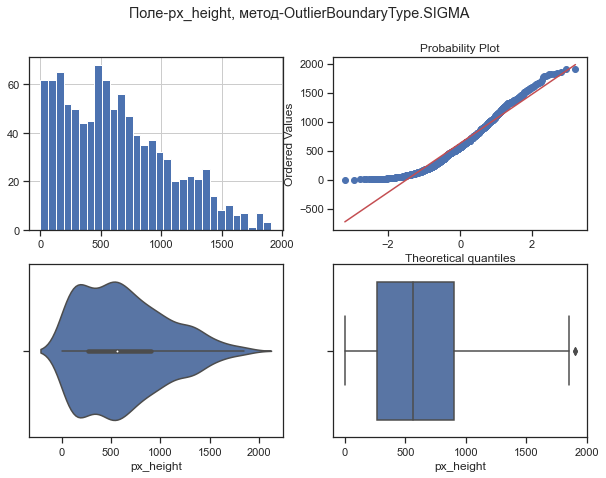

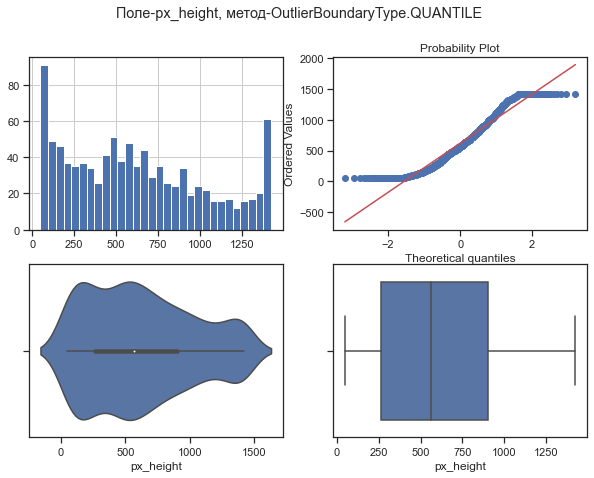

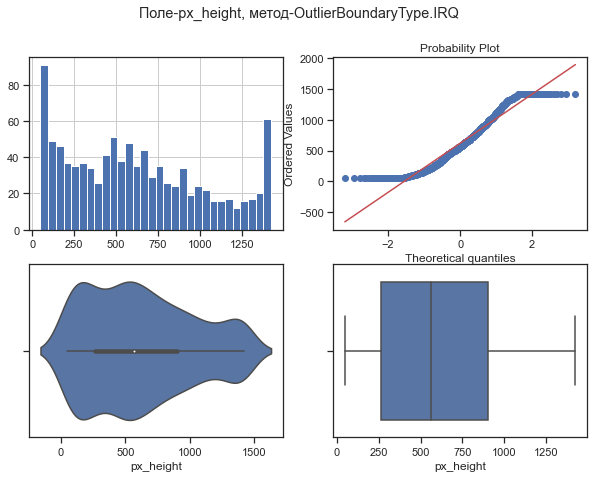

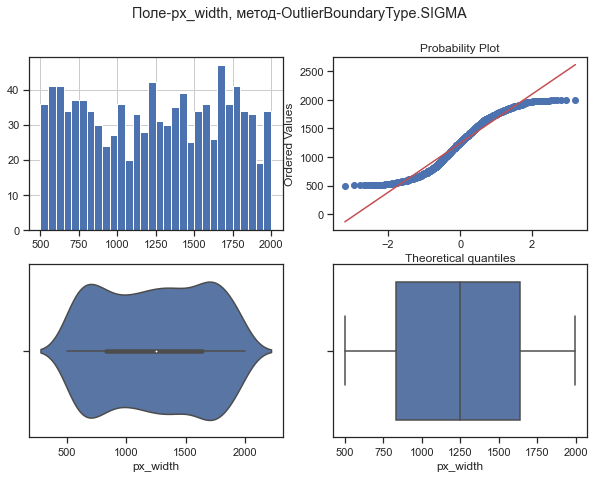

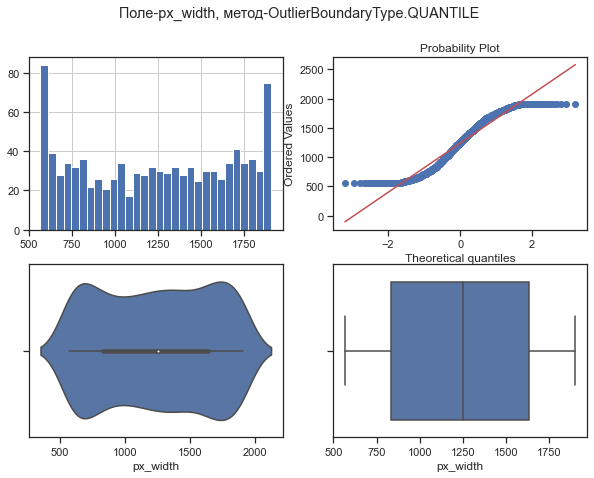

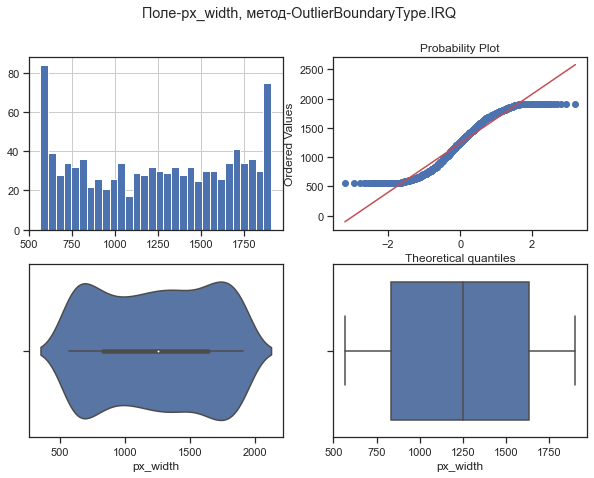

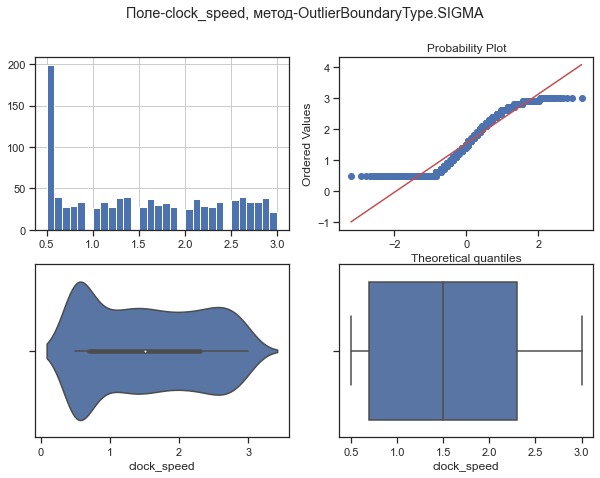

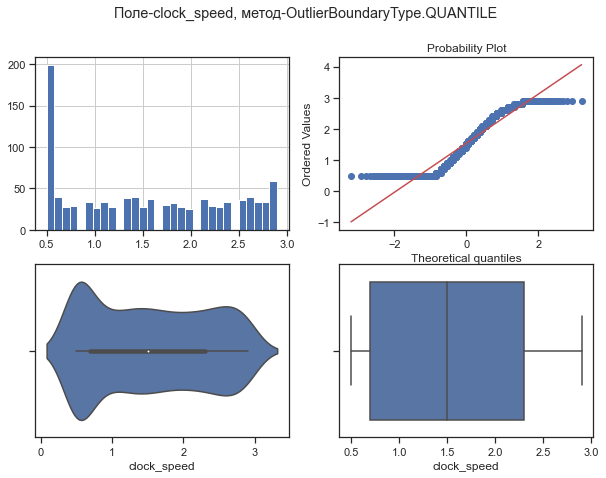

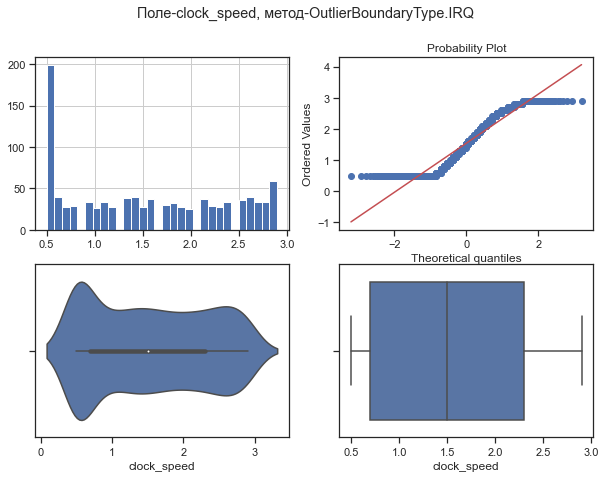

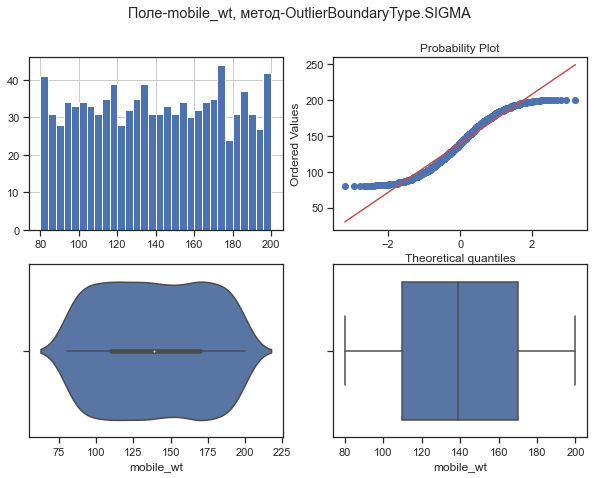

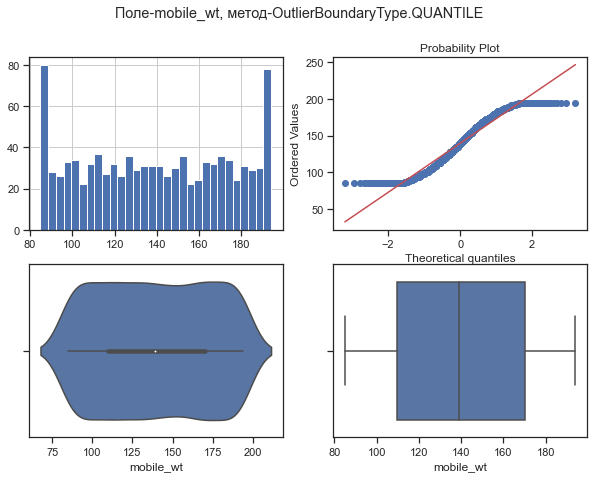

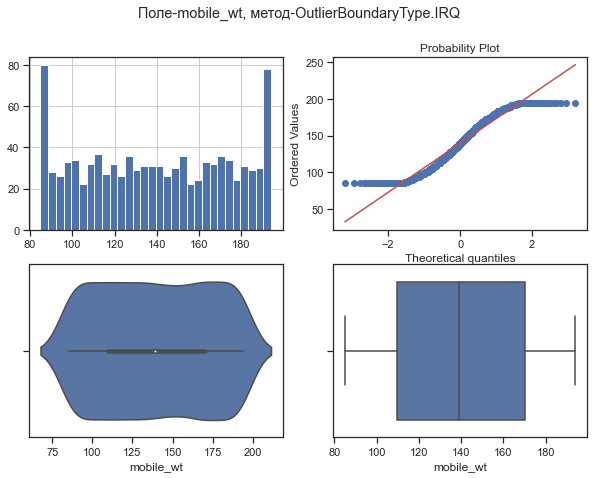

In [157]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

In [158]:
# Будем использовать только обучающую выборку
df = pd.read_csv('1429_1.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

C:\Users\twai1\AppData\Local\Temp\ipykernel_1924\3722640383.py:2: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('1429_1.csv', delimiter=',')


In [159]:

df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [160]:
df = df[['reviews.date','reviews.dateAdded']]
df = df.dropna()
# Сконвертируем дату и время в нужный формат
df['reviews_time'] = df.apply(lambda x: pd.to_datetime(x['reviews.date'], format='%Y-%m-%dT%H:%M:%S'), axis=1)
df['reviews_time_added'] = df.apply(lambda x: pd.to_datetime(x['reviews.dateAdded'], format='%Y-%m-%dT%H:%M:%S'), axis=1)

In [161]:
#df[['reviews_time','reviews_time_added']].head()
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00


In [162]:
df.dtypes

reviews.date                       object
reviews.dateAdded                  object
reviews_time          datetime64[ns, UTC]
reviews_time_added    datetime64[ns, UTC]
dtype: object

In [163]:
# День
df['day'] = df['reviews_time_added'].dt.day
# Месяц
df['month'] = df['reviews_time_added'].dt.month
# Год
df['year'] = df['reviews_time_added'].dt.year
# Часы
df['hour'] = df['reviews_time_added'].dt.hour
#Минуты
df['minute'] = df['reviews_time_added'].dt.minute
#Секунды
df['second'] = df['reviews_time_added'].dt.second
#Неделя года
df['week'] = df['reviews_time_added'].dt.isocalendar().week
#Квартал
df['quarter'] = df['reviews_time_added'].dt.quarter
#День недели 
df['dayofweek'] = df['reviews_time_added'].dt.dayofweek
#Выходной день
df['day_name'] = df['reviews_time_added'].dt.day_name()
df['is_holiday'] = df.apply(lambda x: 1 if x['reviews_time_added'].dayofweek in [5,6] else 0, axis=1)

In [164]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,27,3,0,Monday,0


In [165]:
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    df[f_new] = MinMaxScaler().fit_transform(df[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled',
 'quarter_scaled',
 'dayofweek_scaled']

In [166]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,is_holiday,year_scaled,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0,1.0,0.037037,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0


In [167]:
# Разница между датами 
utc=pytz.UTC
df['now'] = datetime.datetime.now(tz=utc)
df['diff'] = df['now'] - df['reviews_time']
df.dtypes
df['diff']

0       1970 days 14:12:03.614920
1       1970 days 14:12:03.614920
2       1970 days 14:12:03.614920
3       1970 days 14:12:03.614920
4       1971 days 14:12:03.614920
                   ...           
34622   2221 days 14:12:03.614920
34623   2162 days 14:12:03.614920
34624   2377 days 14:12:03.614920
34626   2098 days 14:12:03.614920
34628   2427 days 14:12:03.614920
Name: diff, Length: 24037, dtype: timedelta64[ns]

In [168]:
# Чтобы получить разницу между датами в заданных единицах 
# (минутах, днях и т.д.) нужно разделить timedelta64 на длительность
df['diff_days']=df['diff']/np.timedelta64(1,'D')
df.dtypes

reviews.date                       object
reviews.dateAdded                  object
reviews_time          datetime64[ns, UTC]
reviews_time_added    datetime64[ns, UTC]
day                                 int64
month                               int64
year                                int64
hour                                int64
minute                              int64
second                              int64
week                               UInt32
quarter                             int64
dayofweek                           int64
day_name                           object
is_holiday                          int64
year_scaled                       float64
day_scaled                        float64
month_scaled                      float64
hour_scaled                       float64
minute_scaled                     float64
second_scaled                     float64
week_scaled                       float64
quarter_scaled                    float64
dayofweek_scaled                  

In [169]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,0.444444,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1971 days 14:12:03.614920,1971.591709


In [170]:
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

# Опеределим периоды для признаков
for f in dt_features:
    print(f, df[f].min(), df[f].max())

year 2016 2017
day 2 29
month 3 12
hour 0 23
minute 0 59
second 0 59
week 10 50
quarter 1 4
dayofweek 0 6


In [171]:
# периоды для признаков
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]

In [172]:
df['year_round'] = df.apply(lambda x: 1 if x['year']==2017 else 0, axis=1)
dt_features_round = ['year_round']

df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days,year_round
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709,1
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709,1
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709,1
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1970 days 14:12:03.614920,1970.591709,1
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,1.0,0.559322,0.254237,0.425,0.666667,0.0,2022-06-06 14:12:03.614920+00:00,1971 days 14:12:03.614920,1971.591709,1


In [173]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    df[f_cos] = df.apply(lambda x: round_code(x[f], p), axis=1)
    df[f_sin] = df.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round    

CPU times: total: 8.41 s
Wall time: 8.42 s


['year_round',
 'day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin',
 'quarter_cos',
 'quarter_sin',
 'dayofweek_cos',
 'dayofweek_sin']

In [174]:
df.head()

,reviews.date,reviews.dateAdded,reviews_time,reviews_time_added,day,month,year,hour,minute,second,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
1,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
2,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
3,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-13 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0
4,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,2017-01-12 00:00:00+00:00,2017-07-03 23:33:15+00:00,3,7,2017,23,33,15,...,-0.951057,-0.309017,2.832769e-16,1.0,-0.992709,-0.120537,-1.836970e-16,-1.0,1.0,0.0


In [175]:
data_select = data_cs42_scaled_train
selector_1211 = VarianceThreshold(threshold=0.15)
selector_1211.fit(data_select)
# Значения дисперсий для каждого признака
selector_1211.variances_

array([0.33796816, 0.33676181, 0.24969375, 0.27038962, 0.24859375,
       0.55435586, 0.24981094, 0.34144399, 0.33402278, 0.31116734,
       0.45168858, 0.30294255, 0.30060312, 0.49480486, 0.37855432,
       0.18624375, 0.24999844])

In [176]:
# Константный и псевдоконстантный признаки удалены
selector_1211.transform(data_select)

array([[-0.22512563, -0.94348404,  0.        , ..., -0.77777778,
         0.        ,  1.        ],
       [ 1.00502513, -0.41954787,  0.        , ...,  0.11111111,
         0.        ,  1.        ],
       [ 0.98090452,  0.99268617,  0.        , ..., -0.22222222,
         0.        ,  0.        ],
       ...,
       [ 0.8321608 ,  0.53922872, -1.        , ...,  0.11111111,
         0.        ,  1.        ],
       [-0.52060302,  0.35571809, -1.        , ..., -0.44444444,
        -1.        ,  1.        ],
       [-0.91859296,  0.61635638, -1.        , ...,  0.11111111,
         0.        ,  0.        ]])

In [177]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [178]:
get_duplicates(data_select)

{'id': [],
 'battery_power': [],
 'blue': [],
 'clock_speed': [],
 'dual_sim': [],
 'fc': [],
 'four_g': [],
 'int_memory': [],
 'mobile_wt': [],
 'pc': [],
 'px_height': [],
 'px_width': [],
 'sc_h': [],
 'sc_w': [],
 'talk_time': [],
 'three_g': [],
 'touch_screen': []}

<AxesSubplot:>

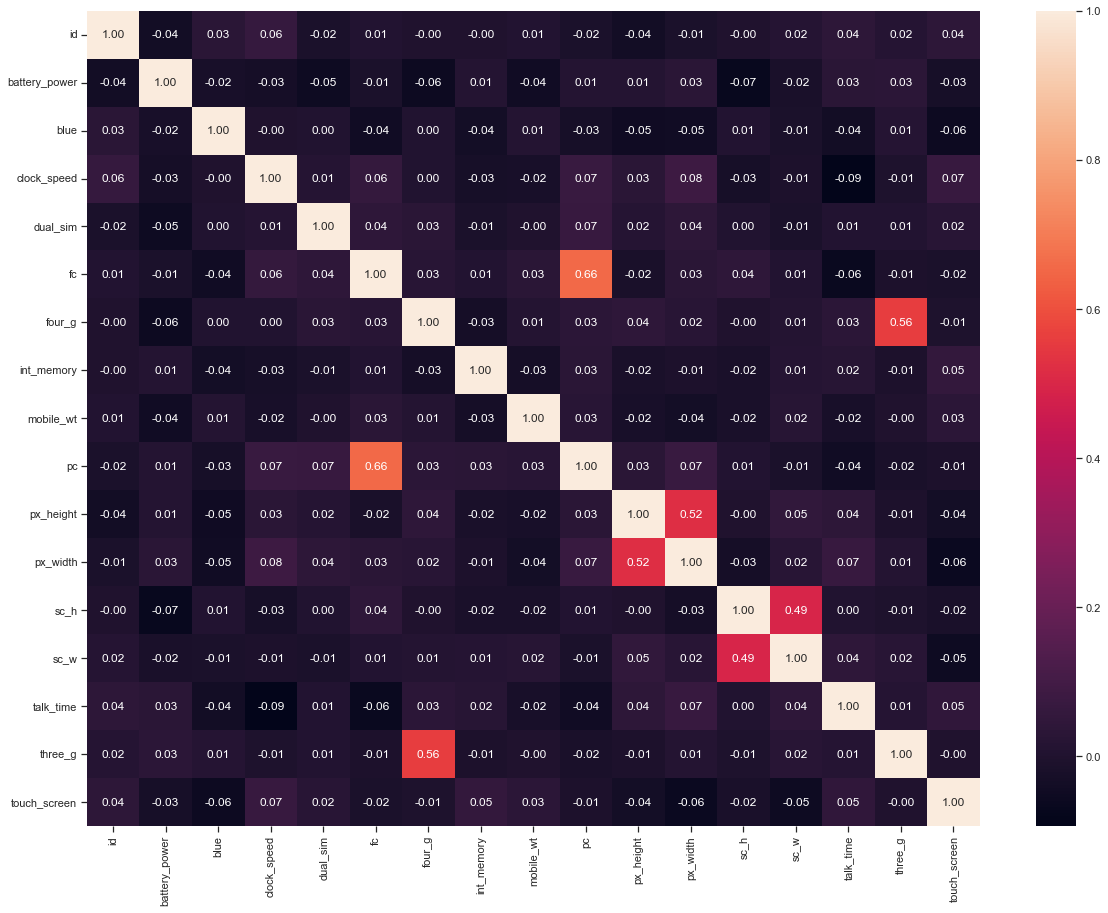

In [179]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data_select.corr(), annot=True, fmt='.2f',ax=ax)

In [180]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [181]:
make_corr_df(data_select)

,f1,f2,corr


In [182]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[]

Text(0, 0.5, 'Взаимная информация')

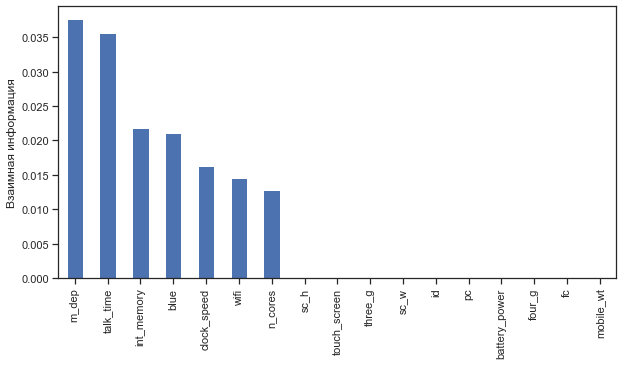

In [183]:
# DataFrame не содержащий целевой признак
data_select = data.drop(['dual_sim','px_width','px_height'], axis=1)
data_select = data_select.dropna()
selectX = data_select.drop(['ram'],axis=1)
Y = data_select['ram']
mi = mutual_info_regression(selectX, Y)
mi = pd.Series(mi)
mi.index = selectX.columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [184]:
sel_mi = SelectKBest(mutual_info_regression, k=5).fit(selectX, Y)

list(zip(selectX.columns, sel_mi.get_support()))

[('id', False),
 ('battery_power', False),
 ('blue', True),
 ('clock_speed', True),
 ('fc', False),
 ('four_g', False),
 ('int_memory', True),
 ('m_dep', True),
 ('mobile_wt', False),
 ('n_cores', False),
 ('pc', False),
 ('sc_h', False),
 ('sc_w', False),
 ('talk_time', True),
 ('three_g', False),
 ('touch_screen', False),
 ('wifi', False)]

In [185]:

selectX.columns[sel_mi.get_support()]

Index(['blue', 'clock_speed', 'int_memory', 'm_dep', 'talk_time'], dtype='object')

In [186]:
import  import_ipynb
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

ModuleNotFoundError: No module named 'mlxtend'

In [187]:
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(selectX[:200], Y[:200], custom_feature_names=selectX.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

NameError: name 'EFS' is not defined

In [188]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(selectX, Y, custom_feature_names=selectX.columns)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

NameError: name 'EFS' is not defined

In [189]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(selectX, Y)
# Коэффициенты регрессии
e_lr1.coef_

array([[-2.53023342e-02, -5.80166474e-03,  4.43186154e+00, ...,
         0.00000000e+00, -5.72126818e+00,  0.00000000e+00],
       [ 1.03561434e-03, -5.20402055e-03, -5.48987666e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.95600783e+00],
       [ 1.50480145e-02, -2.16817799e-04,  7.42681376e+00, ...,
         0.00000000e+00,  4.52255680e+00, -7.76326135e+00],
       ...,
       [-8.69332344e-02, -2.02068290e-02,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.71631539e-03, -1.02398280e-02,  3.86405166e+00, ...,
         0.00000000e+00, -1.20990677e+01, -6.19171698e+00],
       [-7.99424623e-03,  1.74447731e-02, -5.72297873e+00, ...,
        -1.61411263e+01,  3.01455851e+00, -1.76131659e+01]])

In [190]:
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(selectX, Y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [191]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=5000, dual=False)
e_lr2.fit(selectX, Y)
# Коэффициенты регрессии
e_lr2.coef_

array([[-5.18411161e-04, -3.89616837e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.61874964e-04, -1.73318797e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.14312837e-05, -1.57150551e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.33902076e-04, -1.32394637e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.73067061e-04, -6.17747443e-04,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.85969299e-05,  7.66990955e-06,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [192]:
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(selectX, Y)
sel_e_lr2.get_support()

array([ True,  True, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False])

In [193]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(selectX, Y)
# Коэффициенты регрессии
list(zip(selectX.columns, e_ls1.coef_))

[('id', -0.17009662120857336),
 ('battery_power', -0.06866374656168905),
 ('blue', 106.69980516168043),
 ('clock_speed', 0.0),
 ('fc', -8.999056176316834),
 ('four_g', 47.53849791144925),
 ('int_memory', -0.20358767802549568),
 ('m_dep', 68.49577168439173),
 ('mobile_wt', 0.9456418003862929),
 ('n_cores', -20.790295272320712),
 ('pc', -3.9497812569221002),
 ('sc_h', 2.456596668068263),
 ('sc_w', 6.252941927107051),
 ('talk_time', -0.5646335964563717),
 ('three_g', 47.94958681151395),
 ('touch_screen', -83.42821544017599),
 ('wifi', -82.84041936629959)]

In [194]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(selectX, Y)
list(zip(selectX.columns, sel_e_ls1.get_support()))

[('id', True),
 ('battery_power', True),
 ('blue', True),
 ('clock_speed', False),
 ('fc', True),
 ('four_g', True),
 ('int_memory', True),
 ('m_dep', True),
 ('mobile_wt', True),
 ('n_cores', True),
 ('pc', True),
 ('sc_h', True),
 ('sc_w', True),
 ('talk_time', True),
 ('three_g', True),
 ('touch_screen', True),
 ('wifi', True)]

In [ ]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(selectX, Y)
rfc1.fit(selectX, Y)
gbc1.fit(selectX, Y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

In [ ]:
_,_=draw_feature_importances(dtc1, selectX, 'Решающее дерево',figsize=(15,8))

In [107]:
list(zip(selectX.columns, SelectFromModel(dtc1).fit(selectX, Y).get_support()))

[('id', True),
 ('battery_power', True),
 ('blue', False),
 ('clock_speed', True),
 ('fc', False),
 ('four_g', False),
 ('int_memory', True),
 ('m_dep', True),
 ('mobile_wt', True),
 ('n_cores', False),
 ('pc', True),
 ('sc_h', True),
 ('sc_w', True),
 ('talk_time', True),
 ('three_g', False),
 ('touch_screen', False),
 ('wifi', False)]

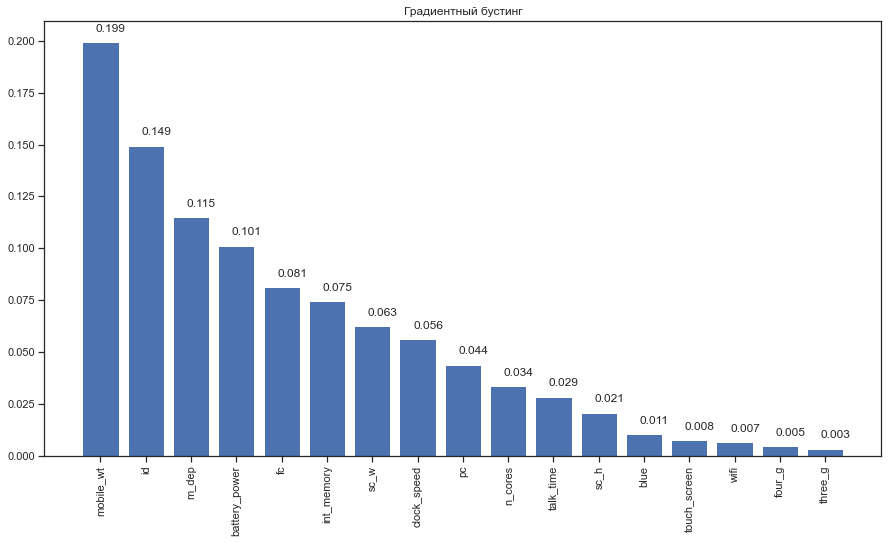

In [108]:
_,_=draw_feature_importances(gbc1, selectX, 'Градиентный бустинг',figsize=(15,8))

In [109]:
list(zip(selectX.columns, SelectFromModel(gbc1).fit(selectX, Y).get_support()))

[('id', True),
 ('battery_power', True),
 ('blue', False),
 ('clock_speed', False),
 ('fc', True),
 ('four_g', False),
 ('int_memory', True),
 ('m_dep', True),
 ('mobile_wt', True),
 ('n_cores', False),
 ('pc', False),
 ('sc_h', False),
 ('sc_w', False),
 ('talk_time', False),
 ('three_g', False),
 ('touch_screen', False),
 ('wifi', False)]

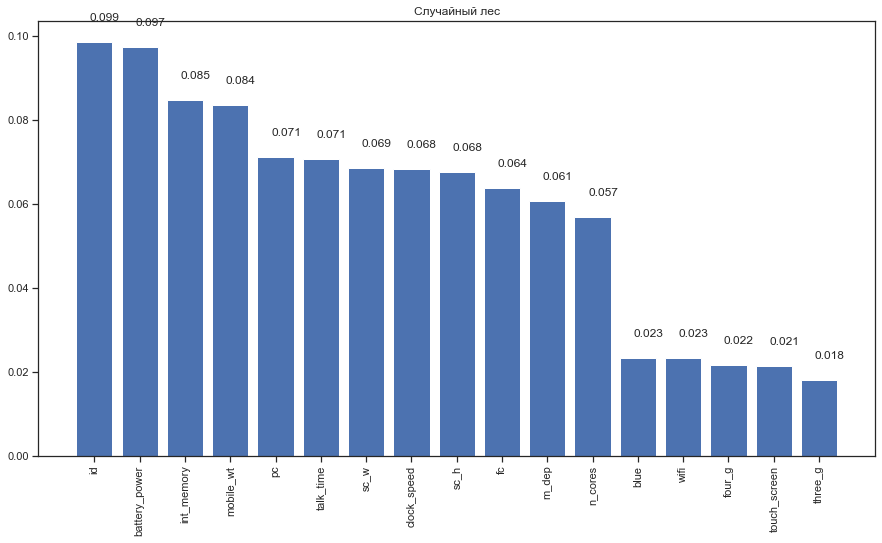

In [110]:

_,_=draw_feature_importances(rfc1, selectX, 'Случайный лес',figsize=(15,8))

In [111]:
list(zip(selectX.columns, SelectFromModel(rfc1).fit(selectX, Y).get_support()))

[('id', True),
 ('battery_power', True),
 ('blue', False),
 ('clock_speed', True),
 ('fc', True),
 ('four_g', False),
 ('int_memory', True),
 ('m_dep', True),
 ('mobile_wt', True),
 ('n_cores', False),
 ('pc', True),
 ('sc_h', True),
 ('sc_w', True),
 ('talk_time', True),
 ('three_g', False),
 ('touch_screen', False),
 ('wifi', False)]

In [112]:
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()
dtr1.fit(selectX, Y)
rfr1.fit(selectX, Y)
gbr1.fit(selectX, Y)

# Важность признаков
dtr1.feature_importances_, sum(dtr1.feature_importances_)

(array([0.16780876, 0.14550247, 0.02110927, 0.06665835, 0.05841739,
        0.00604376, 0.08260701, 0.03090996, 0.10184624, 0.0445999 ,
        0.0703989 , 0.04587579, 0.06379226, 0.06714511, 0.00469101,
        0.01016348, 0.01243033]),
 1.0)

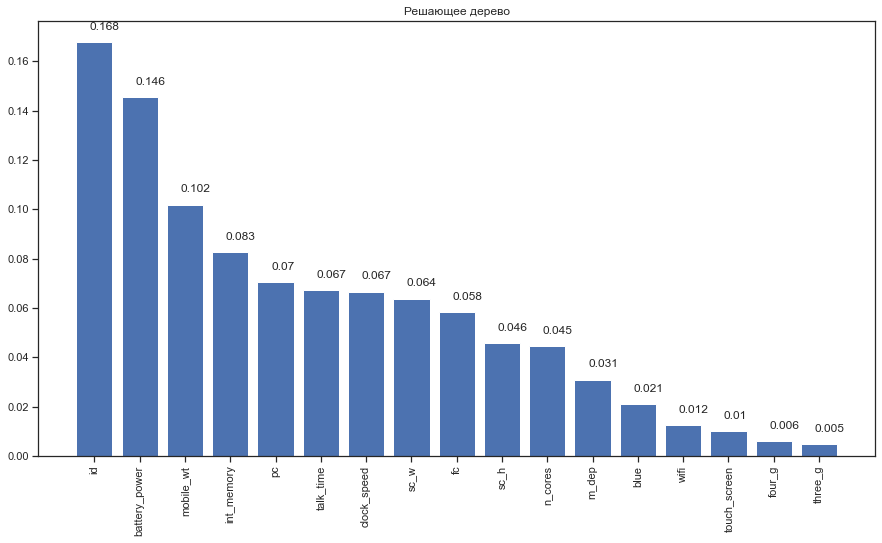

In [113]:
_,_=draw_feature_importances(dtr1, selectX, 'Решающее дерево', figsize=(15,8))

In [114]:
list(zip(selectX.columns, SelectFromModel(dtr1).fit(selectX, Y).get_support()))

[('id', True),
 ('battery_power', True),
 ('blue', False),
 ('clock_speed', True),
 ('fc', True),
 ('four_g', False),
 ('int_memory', True),
 ('m_dep', False),
 ('mobile_wt', True),
 ('n_cores', False),
 ('pc', True),
 ('sc_h', False),
 ('sc_w', False),
 ('talk_time', False),
 ('three_g', False),
 ('touch_screen', False),
 ('wifi', False)]

In [ ]:
_,_=draw_feature_importances(gbr1, selectX, 'Градиентный бустинг', figsize=(15,8))

In [ ]:
list(zip(selectX.columns, SelectFromModel(gbr1).fit(selectX, Y).get_support()))